#前處理

In [0]:
_=[i for i in range(999999999)]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__, tf.__file__)
import keras
print(keras.__version__, keras.__file__)

2.2.0 /usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py
2.3.1 /usr/local/lib/python3.6/dist-packages/keras/__init__.py


Using TensorFlow backend.


In [0]:
import numpy as np
import os

In [4]:
import importlib

u = importlib.import_module("drive.Shared drives.深度學習於生醫資料分析.util")
#使用汪汪的工具模組，使用方法請用 help() 指令來查詢

help(u)

Help on module drive.Shared drives.深度學習於生醫資料分析.util in drive.Shared drives.深度學習於生醫資料分析:

NAME
    drive.Shared drives.深度學習於生醫資料分析.util

CLASSES
    builtins.object
        Img_reader
    
    class Img_reader(builtins.object)
     |  能以多線程的方式讀取圖片資料，將其依據資料夾自動分類，並處理成 array 和標籤
     |  
     |  Parameters:
     |      path:       圖片資料的路徑。
     |  
     |      label_name: 標籤名稱的 list，需能對應上路徑中的各類別資料夾名稱，若不指定，會自行判斷。
     |  
     |      size:       訓練資料的 array size，需包含色彩軸，若圖片為灰階，色彩軸應為 1。
     |  
     |      rescale:    圖片重訂比例。
     |  
     |  Return:
     |      圖片讀取的物件
     |  
     |  Methods defined here:
     |  
     |  __init__(self, path, label_name=None, size=(512, 512, 1), rescale=None)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  read_by_thread(self, thread_num=3, shuffle=True)
     |      開始讀圖片資料。
     |      
     |      Parameters:
     |          thread_num: 多線程數量。
     |      
     |          shuffle:    是否將資料順序打亂。
     |         

In [0]:
Img_reader = u.Img_reader   #圖片資料讀取物件
vis_img = u.vis_img   #顯示圖片 array 

#Input Training(labels) and Testing Data


In [6]:
#先建立訓練資料用的圖片資料讀取物件

train_reader = Img_reader("/content/drive/Shared drives/深度學習於生醫資料分析/MURA/train/", # 訓練集圖片的文件夾
                          size = (224,224,1), # 調整後每張圖片的大小
                          rescale = 1/255.) # 圖片像素值為0-255，此處都乘以1/255，調整到0-1之間

label_name = train_reader.label_name
print(train_reader.label_name) #訓練資料的標籤名 list

['WRIST_negative', 'ELBOW_negative', 'SHOULDER_negative']


In [7]:
test_reader = Img_reader("/content/drive/Shared drives/深度學習於生醫資料分析/MURA/test/", # 訓練集圖片的文件夾
                         label_name = label_name,
                         size = (224,224,1), # 調整後每張圖片的大小
                         rescale = 1/255.) # 圖片像素值為0-255，此處都乘以1/255，調整到0-1之間

test_data,test_label = test_reader.read_by_thread(thread_num = 1000,  #指定要使用多少線程
                                                  shuffle = True)  #是否打亂資料集順序

Found 2580 images belonging to 3 classes.
100%


#Make VGG16 Model

In [0]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [0]:
def VGG16():
    img_input = Input(shape=(224,224,1))
    
    x = Conv2D(filters=64, kernel_size=(3,3),
               activation='relu', padding='same')(img_input)
    x = Conv2D(filters=64, kernel_size=(3,3),
               activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2, 2))(x)
    
    x = Conv2D(filters=128, kernel_size=(3,3),
               activation='relu', padding='same')(x)
    x = Conv2D(filters=128, kernel_size=(3,3),
               activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2, 2))(x)
    
    x = Conv2D(filters=256, kernel_size=(3,3),
               activation='relu', padding='same')(x)
    x = Conv2D(filters=256, kernel_size=(3,3),
               activation='relu', padding='same')(x)
    x = Conv2D(filters=256, kernel_size=(3,3),
               activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2, 2))(x)
    
    x = Conv2D(filters=512, kernel_size=(3,3),
               activation='relu', padding='same')(x)
    x = Conv2D(filters=512, kernel_size=(3,3),
               activation='relu', padding='same')(x)
    x = Conv2D(filters=512, kernel_size=(3,3),
               activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2, 2))(x)
    
    x = Conv2D(filters=512, kernel_size=(3,3),
               activation='relu', padding='same')(x)
    x = Conv2D(filters=512, kernel_size=(3,3),
               activation='relu', padding='same')(x)
    x = Conv2D(filters=512, kernel_size=(3,3),
               activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2, 2))(x)
    
    x = Flatten()(x)
    
    x = Dense(4096, activation='relu')(x)
    
    x = Dense(3, activation='softmax')(x)
    
    return Model(inputs=img_input, outputs=x)

In [10]:
model_folder = "/content/drive/My Drive/YM_HW_VGG16_model"

if not os.path.exists(model_folder):
    os.mkdir(model_folder)
    print("建立資料夾: " + model_folder)
else:
    print(model_folder + " 資料夾已存在")

model_path = "/content/drive/My Drive/YM_HW_VGG16_model/weights.h5"
if os.path.exists(model_path):
    print("Found model, it will keep training!")
    model = load_model(model_path)
else:
    model = VGG16()

/content/drive/My Drive/YM_HW_VGG16_model 資料夾已存在


In [0]:
from tensorflow.keras.optimizers import Adam

In [0]:
model.compile(loss='sparse_categorical_crossentropy', #因標籤為整數資料，故使用此損失函數
              optimizer=Adam(lr=0.0001),  #lr:學習率 = 0.0001
              metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

#filepath="/content/drive/My Drive/YM/HW_VGG16/model/weights-{epoch:02d}-{val_acc:.2f}.h5"
filepath="/content/drive/My Drive/YM_HW_VGG16_model/weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#只存取準確率最高的模型和權重
callbacks_list = [checkpoint]

#Feature Maps

In [0]:
f_model = Model(inputs=model.input,outputs=model.layers[9].output)

In [15]:
f_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0   

In [0]:
feature_maps = f_model.predict(test_data[4:5])

In [38]:
feature_maps[0][].shape

(56, 56, 256)

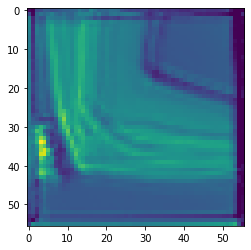

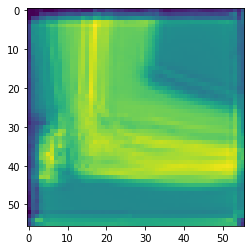

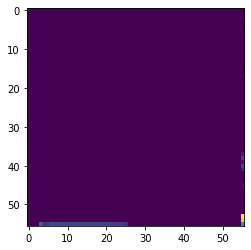

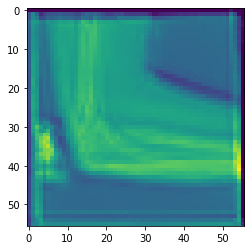

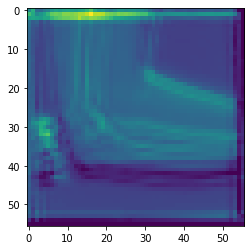

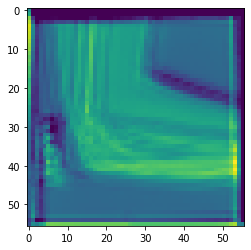

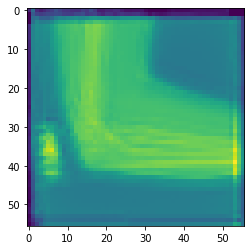

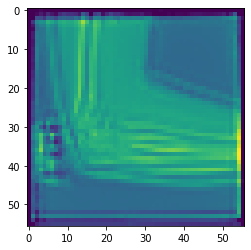

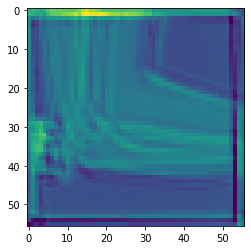

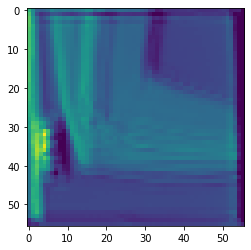

In [41]:
for i in range(10):
  vis_img(feature_maps[0,:,:,i])

In [0]:
big_map=np.zeros((580,580)).astype('uint8')

In [32]:
big_map.std()

0.0

In [35]:
for i in range(10):
  for j in range(10):
    feature_map = feature_maps[0][:,:,i*10+j]
    feature_map -= feature_map.mean()
    feature_map /= feature_map.std()
    feature_map *= 64
    feature_map += 128
    feature_map = np.clip(feature_map, 0, 255).astype('uint8') 
    big_map[i*58:i*58+56,j*58:j*58+56] = feature_map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


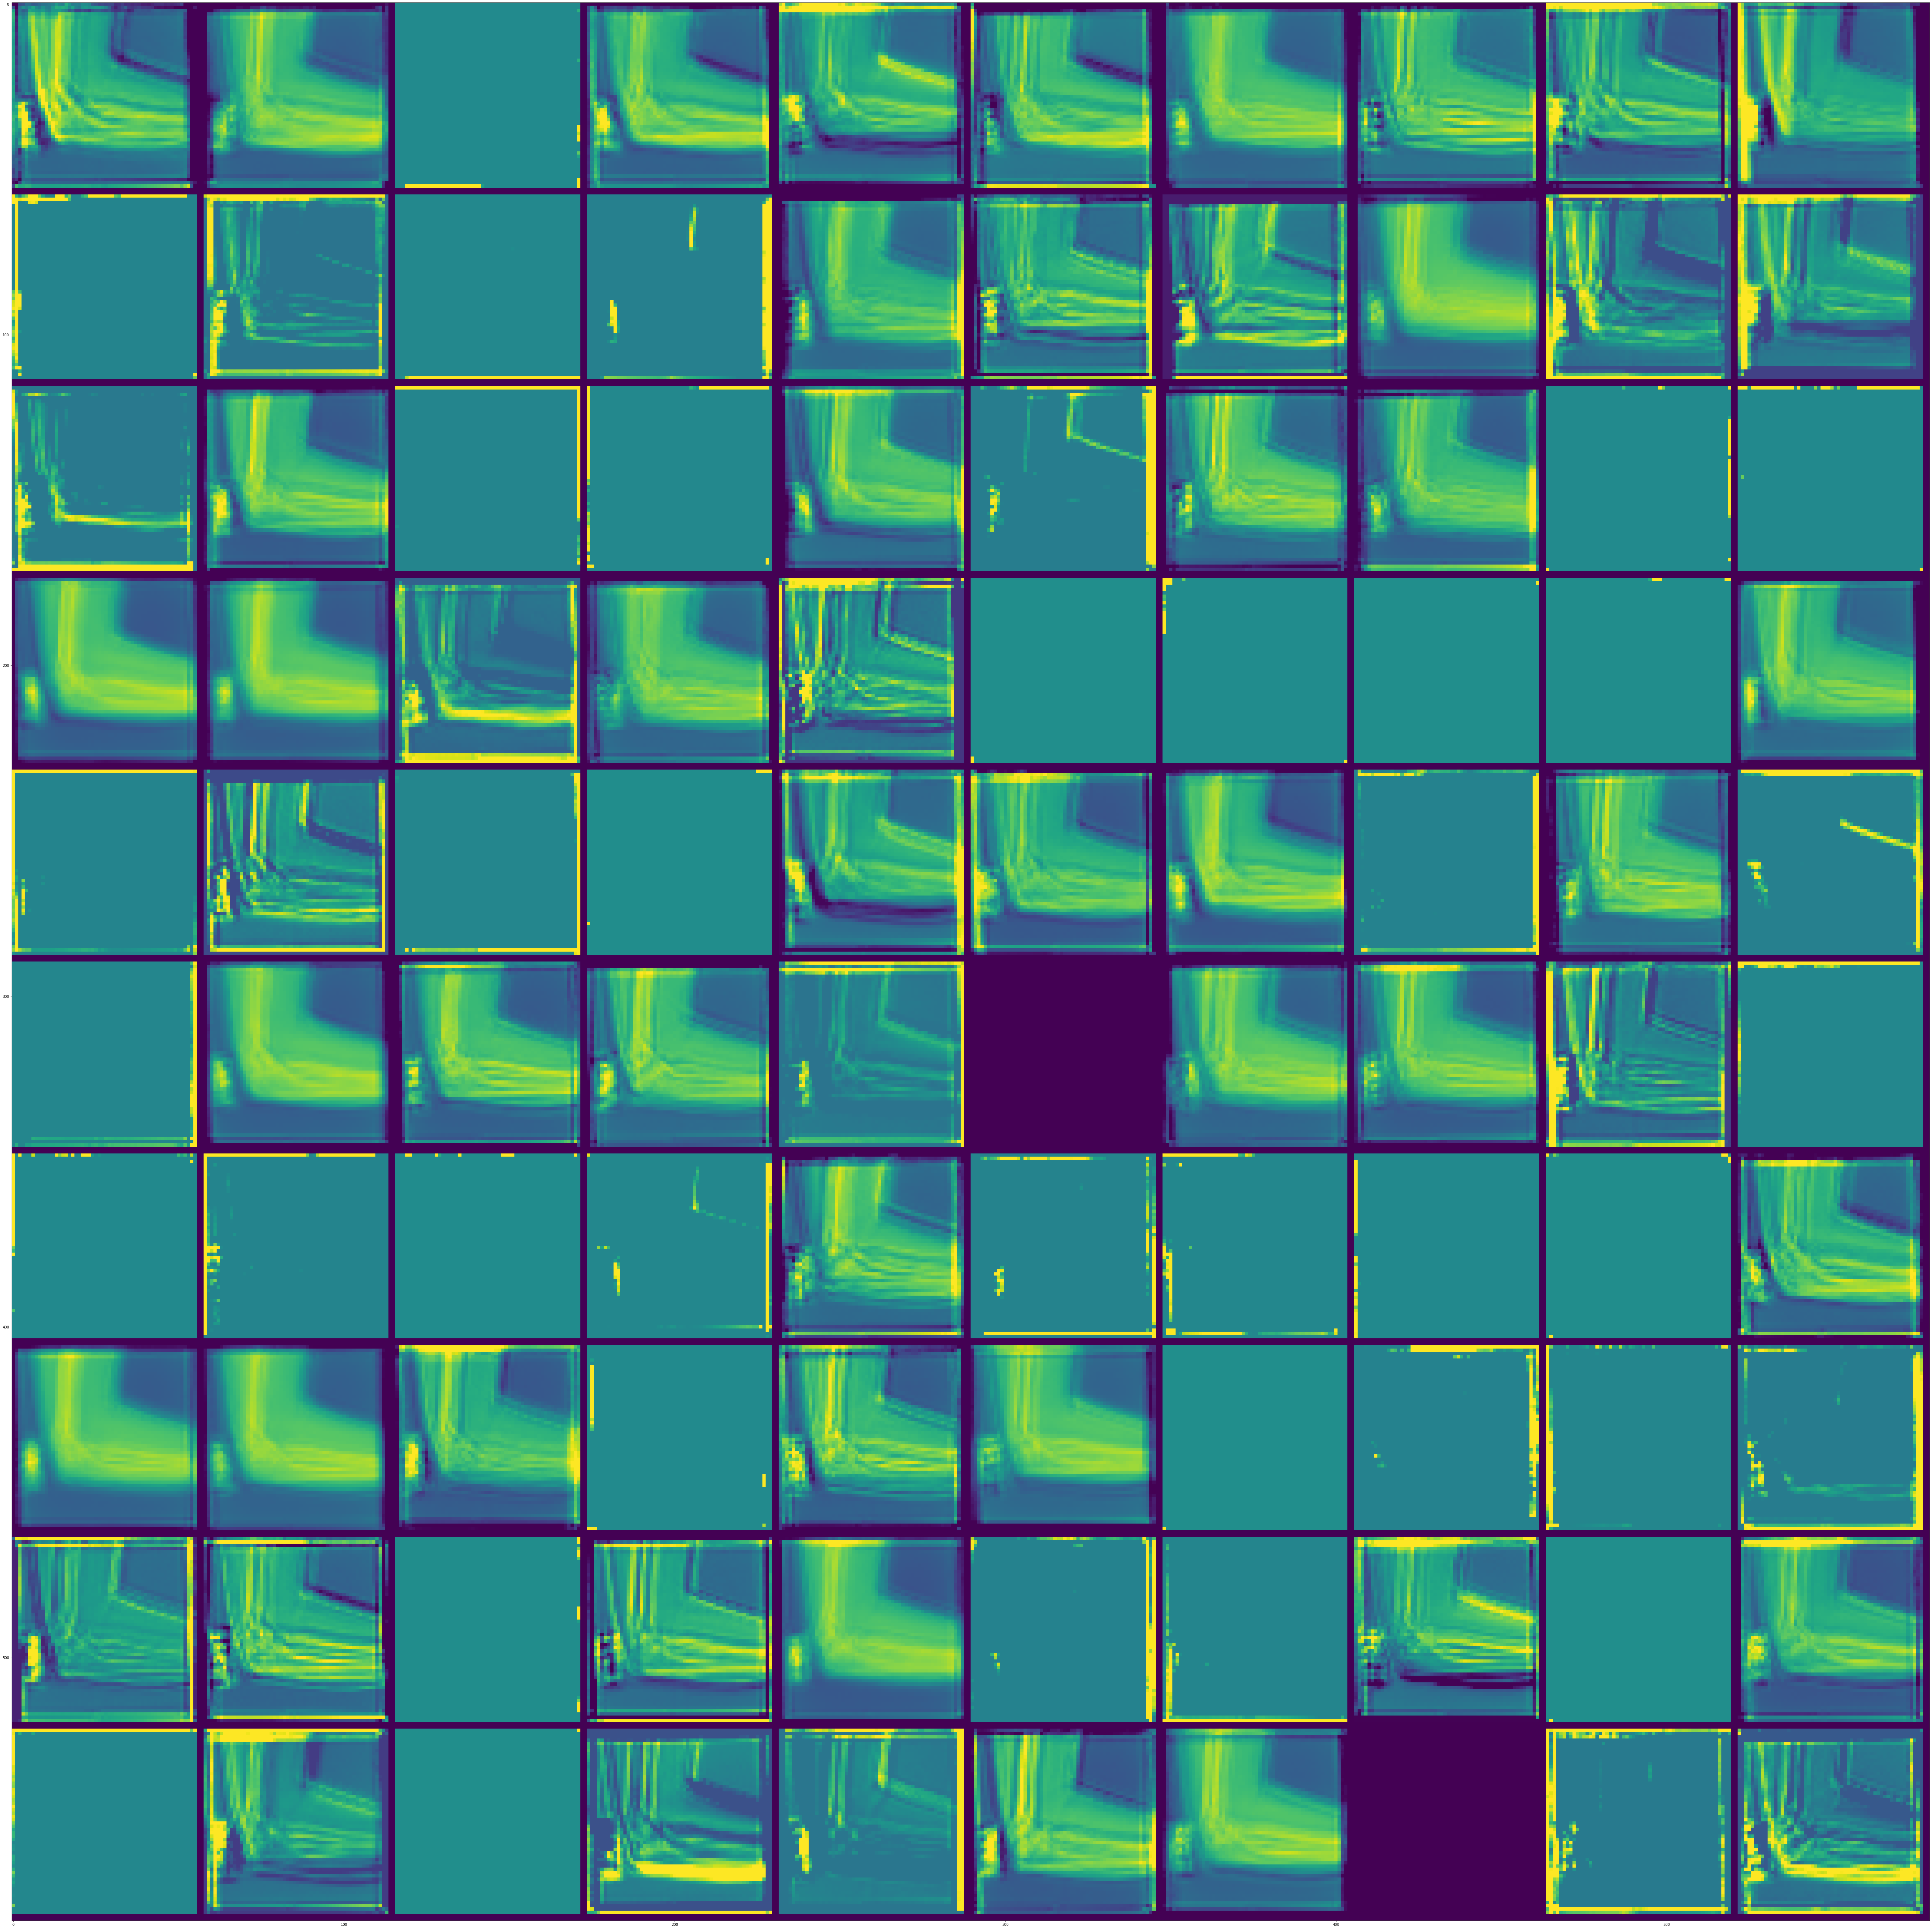

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (100,100))
plt.imshow(big_map)
plt.show()